In [64]:
import Pkg
Pkg.activate(".")
Pkg.add(["Random","LinearAlgebra","Plots","Distributions"])     

  Activating project at `C:\Users\Owner`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`


In [65]:
using Random, LinearAlgebra,Plots,Distributions

In [66]:
nd = Normal(0,1)

Normal{Float64}(μ=0.0, σ=1.0)

In [67]:
data = rand(nd, 1000,2)

1000×2 Matrix{Float64}:
 -0.673793   -0.10244
 -0.659547    0.963403
 -0.729756   -1.16931
  1.53892    -0.330607
 -2.08579    -0.480135
 -0.265429    0.712162
 -0.170047   -0.883108
  0.759532   -1.05705
 -0.67146    -0.951113
 -1.68761    -0.783813
 -0.352449    0.338953
 -0.367941    0.745622
 -0.0826171  -1.16292
  ⋮          
 -0.646199    1.2309
  1.49097     0.354335
 -1.49931     0.299577
 -0.486488    0.59262
  0.514961   -0.799715
  0.13496     0.228837
  1.24402     0.161586
 -0.949989   -1.25131
  1.52933    -0.0112254
  0.559214   -0.789962
 -0.141375   -0.900642
 -0.210671   -1.28364

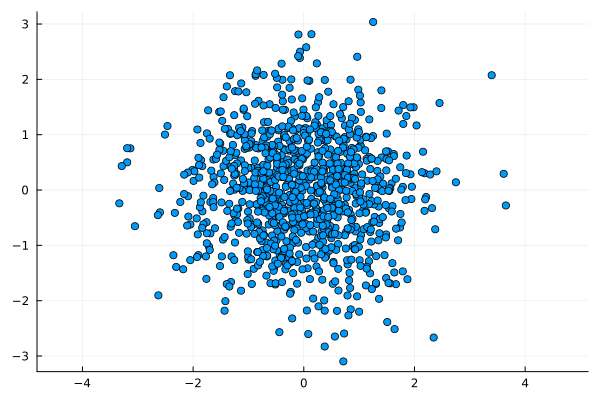

In [68]:
scatter(data[:,1], data[:,2], legend = nothing, aspect_ratio = :equal)

In [69]:
datas = copy(data)
datas[:,2] = datas[:,2]*3

1000-element Vector{Float64}:
 -0.3073206224684143
  2.8902102752386156
 -3.507923122523171
 -0.9918197491458438
 -1.4404042145734606
  2.136487100942973
 -2.64932279991225
 -3.1711468924739683
 -2.853338382299644
 -2.351438828027103
  1.0168583046254345
  2.236867038025917
 -3.4887578386454132
  ⋮
  3.6926858006572996
  1.0630063114652781
  0.8987307048201763
  1.7778608309621906
 -2.399144121562253
  0.6865123673986174
  0.48475749653405753
 -3.75394217270673
 -0.033676061338738
 -2.369885681004501
 -2.7019273815387086
 -3.850931855844201

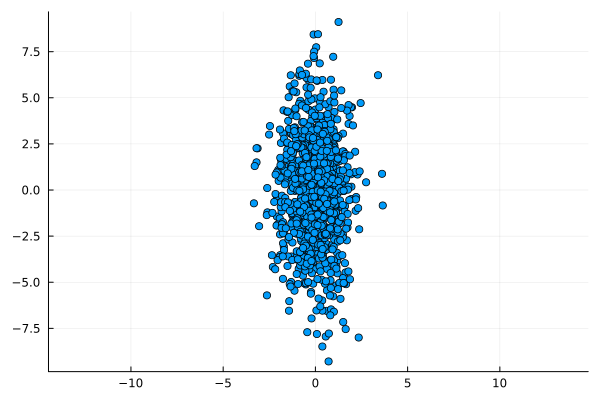

In [70]:
scatter(datas[:,1], datas[:,2], legend = nothing, aspect_ratio = :equal)

In [71]:
θ = π/4
r = [cos(θ) -sin(θ);sin(θ) cos(θ)]

2×2 Matrix{Float64}:
 0.707107  -0.707107
 0.707107   0.707107

In [72]:
datar = datas * r

1000×2 Matrix{Float64}:
 -0.693752   0.259135
  1.57732    2.51006
 -2.99649   -1.96446
  0.386856  -1.7895
 -2.4934     0.456357
  1.32304    1.69841
 -1.9936    -1.75311
 -1.70527   -2.77941
 -2.49241   -1.54282
 -2.85604   -0.469397
  0.469808   0.968246
  1.32153    1.84188
 -2.52534   -2.40851
  ⋮         
  2.15419    3.06805
  1.80594   -0.302619
 -0.424671   1.69567
  0.913138   1.60114
 -1.33232   -2.06058
  0.580869   0.390007
  1.22243   -0.536881
 -3.32618   -1.98269
  1.05758   -1.10521
 -1.28034   -2.07119
 -2.01052   -1.81058
 -2.87199   -2.57405

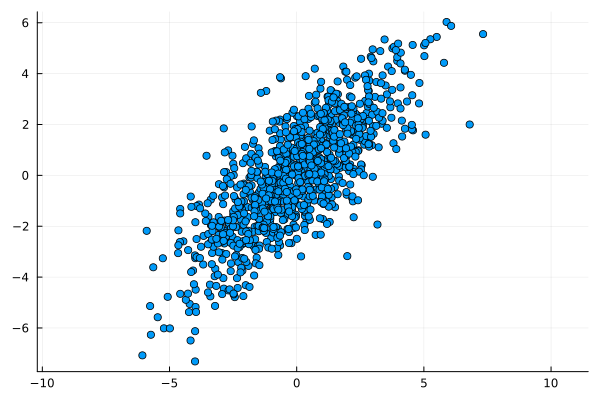

In [73]:
scatter(datar[:,1], datar[:,2], legend = nothing, aspect_ratio = :equal)

In [74]:
u,s,v = svd(datar/sqrt(1000-1))

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
1000×2 Matrix{Float64}:
 -0.00330775   -0.0210977
  0.0320129    -0.0194878
 -0.0386569    -0.024008
 -0.0111555     0.0475687
 -0.015642     -0.0654884
  0.0236357    -0.00748772
 -0.0292445    -0.00626244
 -0.0351293     0.0224995
 -0.0314334    -0.0219536
 -0.0257576    -0.0534192
  0.0112786    -0.0106064
  0.0247578    -0.0106439
 -0.0385289    -0.00384555
  ⋮            
  0.040876     -0.0187794
  0.01155       0.0468249
  0.010122     -0.0463689
  0.0197026    -0.0145035
 -0.0265695     0.0151637
  0.00756631    0.00445378
  0.0051941     0.0389225
 -0.0413462    -0.030957
 -0.000569843   0.0476194
 -0.026252      0.0165527
 -0.0298294    -0.00538862
 -0.0425132    -0.00796595
singular values:
2-element Vector{Float64}:
 2.8638540689988132
 1.0157610546099445
Vt factor:
2×2 Matrix{Float64}:
 0.698779   0.715338
 0.715338  -0.698779

In [75]:
r

2×2 Matrix{Float64}:
 0.707107  -0.707107
 0.707107   0.707107

In [76]:
v * r

2×2 Matrix{Float64}:
 0.999931    0.0117092
 0.0117092  -0.999931

In [77]:
v' * r

2×2 Matrix{Float64}:
 0.999931    0.0117092
 0.0117092  -0.999931

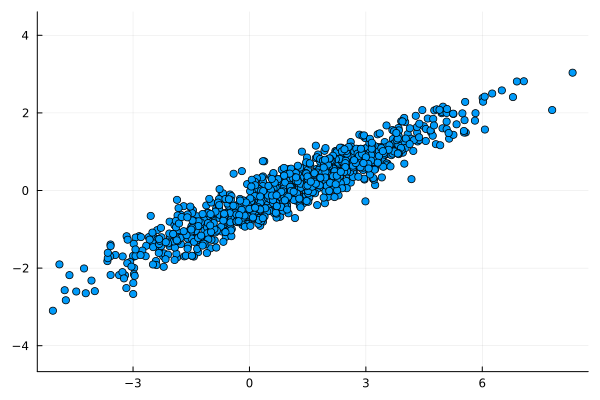

In [78]:
# 1. Translate the data by delta x = 1 and delta y = 1
translation = [1, 1]
translated_data = datar .+ translation'
scatter(translated_data[:,1], data[:,2], legend = nothing, aspect_ratio = :equal)

In [101]:
# 2. Subtract the mean
mean_x = mean(translated_data[:, 1])
mean_y = mean(translated_data[:, 2])
mean_data = translated_data .- [mean_x, mean_y]'

1000×2 Matrix{Float64}:
 -0.669387   0.220708
  1.60168    2.47163
 -2.97213   -2.00289
  0.411222  -1.82793
 -2.46903    0.41793
  1.3474     1.65998
 -1.96923   -1.79154
 -1.6809    -2.81784
 -2.46804   -1.58125
 -2.83167   -0.507824
  0.494173   0.92982
  1.3459     1.80345
 -2.50098   -2.44693
  ⋮         
  2.17856    3.02963
  1.8303    -0.341046
 -0.400306   1.65724
  0.937503   1.56271
 -1.30795   -2.09901
  0.605234   0.35158
  1.2468    -0.575308
 -3.30182   -2.02112
  1.08195   -1.14364
 -1.25597   -2.10961
 -1.98615   -1.84901
 -2.84762   -2.61248

In [123]:
# 3. Apply the PCA
U, S, V = svd(mean_data/sqrt(1000-1))


SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
1000×2 Matrix{Float64}:
 -0.00342381   -0.0197366
  0.0318971    -0.0181317
 -0.0387733    -0.0226433
 -0.01127       0.0489966
 -0.0157592    -0.0641673
  0.0235201    -0.00611857
 -0.0293604    -0.00488247
 -0.0352446     0.0239079
 -0.0315497    -0.0205882
 -0.0258745    -0.0520848
  0.0111629    -0.00923792
  0.0246422    -0.00927796
 -0.0386448    -0.00246159
  ⋮            
  0.0407603    -0.0174242
  0.0114355     0.048248
  0.0100055    -0.0450343
  0.0195869    -0.0131404
 -0.0266849     0.0165636
  0.00745091    0.00583723
  0.00507947    0.0403393
 -0.0414627    -0.0295984
 -0.000684308   0.0490454
 -0.0263673     0.0179539
 -0.0299452    -0.00400772
 -0.0426293    -0.00658519
singular values:
2-element Vector{Float64}:
 2.8638349441005113
 1.0147944146502286
Vt factor:
2×2 Matrix{Float64}:
 0.698825   0.715293
 0.715293  -0.698825

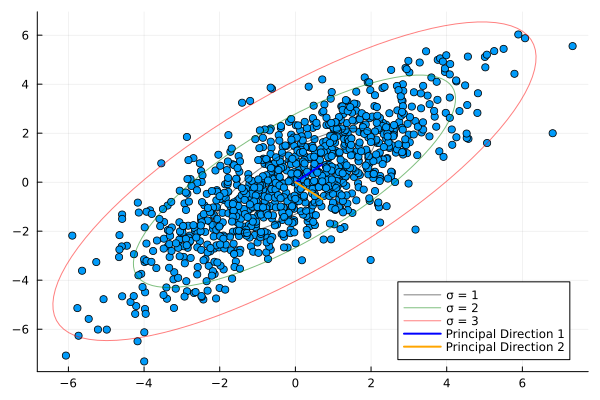

In [172]:
# 4. Plot the original distribution with ellipses with singular values/variances
function plot_ellipse(mean, cov_matrix, ax, sigma, color)
    eigenvalues, eigenvectors = eigen(cov_matrix)  
    radii = sqrt.(eigenvalues) * sigma 
    
    angle = atan(eigenvectors[2, 1], eigenvectors[1, 1])
    
    theta = LinRange(0, 2π, 100)
    x = radii[1] * cos.(theta)
    y = radii[2] * sin.(theta)
    
    rotation_matrix = [cos(angle) -sin(angle); sin(angle) cos(angle)]
  
    ellipse_points = hcat(x, y)  
    rotated_points = (rotation_matrix * ellipse_points')'  
    
    plot!(ax, mean[1] .+ rotated_points[:, 1], mean[2] .+ rotated_points[:, 2], color=color, label="σ = $sigma", alpha=0.5)
end
    
cov_matrix = cov(datar)  
mean_x = mean(datar[:, 1])
mean_y = mean(datar[:, 2])

plot = scatter(datar[:, 1], datar[:, 2],  legend=:bottomright, label="")

plot_ellipse([mean_x, mean_y], cov_matrix, plot, 1, :black)
plot_ellipse([mean_x, mean_y], cov_matrix, plot, 2, :green)
plot_ellipse([mean_x, mean_y], cov_matrix, plot, 3, :red)

plot!(plot, [0, V[1, 1] ], [0, V[2, 1] ], color=:blue, linewidth=2, label="Principal Direction 1")
plot!(plot, [0, V[1, 2] ], [0, V[2, 2] ], color=:orange, linewidth=2, label="Principal Direction 2")